<a href="https://colab.research.google.com/github/Vojaspy/Deep-Learning-Project/blob/master/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import drive
import cv2
import os

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
zip_ref =  ZipFile('/content/drive/MyDrive/Deep Learning Project Dataset/archive (5).zip', 'r')

  #extract in current directory
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
fpath = '/tmp/tea sickness dataset'

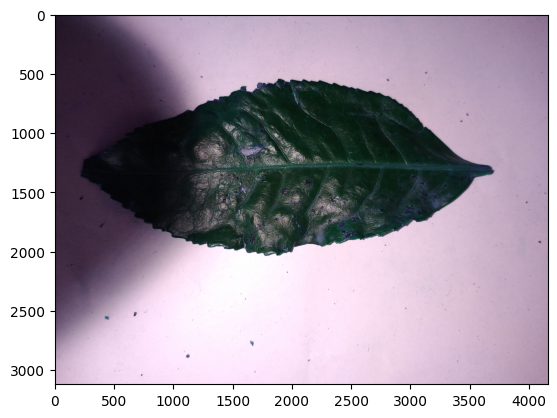

In [ ]:
for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath,cpath)
  for imgpath in os.listdir(cpath):
    img = cv2.imread(os.path.join(cpath, imgpath))
    plt.imshow(img)
    break